# **SOLLDA1 MCO: IBM HR Analytics Employee Attrition & Performance**

## **I. Objective** 
### Clearly state the objective of the analysis, what problem or question the group aims to address with the data. 

This analysis aims to **understand the key factors influencing employee attrition and career growth within IBM**. By examining attributes such as job role, performance rating, years at the company, work-life balance, and employee satisfaction, the group can identify patterns that contribute to voluntary and involuntary departures. In addition, the study will help in recognizing high-potential employees suitable for promotion by leveraging data on job involvement, training opportunities, and post career progression. Through this approach, the group seeks to enhance employee retention strategies and optimize internal talent management. 

## **II. Problem Statement** 
### Explain the problem or question the analysis seeks to solve or explore. A clear and concise statement of the challenge and the significance is needed. 

High employee turnover and ineffective talent management at IBM lead to increased costs and lost productivity. This analysis seeks to:  
1. **Identify factors driving attrition** (e.g., job role, satisfaction, work-life balance).  
2. **Spot high-potential employees for promotion** based on performance, training, and career growth.  
3. **Improve retention strategies** to reduce turnover and enhance employee satisfaction.  

By addressing these issues, IBM can reduce costs, retain top talent, and optimize workforce performance.

## **III. Background** 
### Provide context about the data and the problem domain. Explain where data came from, including its source, collection methds, and any relevant information about its reliability and completeness. 

Employee attrition and talent management are critical issues in the corporate world, as high turnover rates can disrupt operations, increase recruitment costs, and reduce morale. To address these challenges, organizations like IBM can leverage data-driven insights to understand why employees leave and how to identify and retain top talent, ultimately improving workforce stability and performance. The dataset used for this analysis is the **IBM HR Analytics Employee Attrition & Performance Dataset**, available on Kaggle, which contains anonymized employee data focusing on factors related to attrition, performance, and career growth. This data was likely collected through IBM's internal HR systems, including employee surveys, performance reviews, and HR records, and it includes both quantitative metrics (e.g., age, salary, years at the company) and qualitative metrics (e.g., job satisfaction, work-life balance) to provide a comprehensive view of employee dynamics.

## **IV. Data Source**
### Describe the origin of the data, whether it was collected internally or obtained from external sources. Include details such as data provider, data format, and the time period covered by the data. 

The data provider is IBM, and it contains anonymized employee records focusing on factors related to attrition, performance, and career growth. The data was likely gathered through IBM's internal HR systems, including employee surveys, performance reviews, and HR records, and is provided in a structured tabular format (e.g., CSV or Excel). It includes both quantitative metrics (e.g., age, salary, years at the company) and qualitative metrics (e.g., job satisfaction, work-life balance), offering a comprehensive view of employee dynamics.

While the dataset does not explicitly specify the time period it covers, it appears to represent a snapshot of IBM's workforce at a specific point in time, likely spanning multiple years of employee tenure and performance data

## **V. Data Description** 
### Provide a brief overview of the data's structure and contents. Mention the key variables and their meanings. Include any preprocessing steps performed, such as data cleaning, and/or feature engineering.

Import necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

Load the dataset

In [2]:
df = pd.read_csv(r'C:\Users\user\Documents\SOLLDA1_MCO\IBM-HR-Employee-Attrition.csv') 
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Display column names and data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The dataset consists of 35 columns that capture different aspects of employees' professional background, work conditions, and job satisfaction. Below is an explanation of each variable: 

#### **1. Employee Demographics** 
- **Age** (*int*) - The age of the employee. 

- **Gender** (*object*) - The gender of the employee (e.g., Male, Female). 

- **MaritalStatus** (*object*) - The marital status of the employee (e.g., Single, Married, Divorced). 

- **Education** (*int*) - Level of education on a scale (1 to 5) where: 
    - 1 = Below College 
    - 2 = College 
    - 3 = Bachelor 
    - 4 = Master 
    - 5 = Doctorate 
    
- **EducationField** (*object*) - The field of education (e.g., Life Sciences, Marketing, Technical Degree).

#### **2. Job and Work Details** 
- **JobRole** (*object*) - The specific job title of the employee (e.g., Sales Executive, Research Scientist). 

- **Department** (*object*) - The department in which the employee works (e.g., Sales, Research & Development, Human Resources). 

- **JobLevel** (*int*) - The hierarchichal level of the job within the organization (e.g., 1 = Entry Level, 5 = Senior Management). 

- **JobInvolvement** (*int*) - Level of employee involvement in the job.  
    - 1 = Low 
    - 2 = Medium 
    - 3 = High 
    - 4 = Very High 

- **JobSatisfaction** (*int*) - Employee satisfaction with the job. 
    - 1 = Low 
    - 2 = Medium 
    - 3 = High 
    - 4 = Very High 

- **WorkLifeBalance** (*int*) - Employee's perception of work-life balance. 
    - 1 = Bad 
    - 2 = Good 
    - 3 = Better 
    - 4 = Best

- **OverTime** (*object*) - Indicates whether the employee works overtime (Yes/No). 

- **StandardHours** (*int*) - Standard working hours for employees (appears to be a constant value). 

#### **3. Compensation and Benefits** 
- **HourlyRate** (*int*) - The hourly wage of the employee. 

- **DailyRate** (*int*) - The daily pay rate of the employee. 

- **Monthly Income** (*int*) - The total monthly earnings of the employee. 

- **StockOptionLevel** (*int*) - Stock option level granted to the employee (0 = No stock options, 3 = High stock options). 

- **PercentageSalaryHike** (*int*) - Percentage increase in salary after the last performance review. 

#### **4. Employment History and Tenure** 
- **YearsAtCompany** (*int*) - The number of years the employee has been with the company. 

- **YearsInCurrentRole** (*int*) - The number of years the employee has been in their current role. 

- **YearsSinceLastPromotion** (*int*) - The number of years since the employee's last promotion. 

- **YearsWithCurrManager** (*int*) - The number of years the employee has worked with their current manager. 

- **TotalWorkingYears** (*int*) - The total number of years the employee has worked in their career. 

- **NumCompaniesWorked** (*int*) - The number of revious companies the employee has worked for. 

#### **5. Employee Satisfaction and Performance** 
- **PerformanceRating** (*int*) - Employee's most recent performance rating. 
    - 1 = Low 
    - 2 = Good 
    - 3 = Excellent 
    - 4 = Outstanding 

- **RelationShipSatisfaction** (*int*) - Employee's satisfaction with their relationships at work. 
    - 1 = Low 
    - 2 = Medium 
    - 3 = High 
    - 4 = Very High

- **EnvironmentSatisfaction** (*int*) - Employee's satisfaction with the work environment (Scale: 1 = Low, 4 = High). 
    - 1 = Low 
    - 2 = Medium 
    - 3 = High 
    - 4 = Very High

- **TrainingTimesLastYear** (*int*) - Number of training sessions attended by the employee in the last year.

#### **6. Attrition and Travel** 
- **Attrition** (*object*) - Indicates whether the employee has left the company (Yes/No). 

- **BusinessTravel** (*object*) - Frequency of business travel (e.g., Travel_Rarely, Travel_Frequently, Non-Travel).

- **DistanceFromHome** (*int*) - The distance between the employee's home and workplace. 

#### **7. Miscellaneous** 
- **EmployeeNumber** (*int*) - Unique ID assigned to each employee. 

- **EmployeeCount** (*int*) - Seems to be a constant column (always 1). 

- **Over18** (*object*) - Indicates if the employee is over 18 (constant "Y" for all). 

 Dropping columns due to redundancy or minimal impact

- **EmployeeNumber** - just an ID, not useful for the analysis.
- **HourlyRate, DailyRate** -  These are compensation-related columns. While compensation can influence attrition, Monthly Income is sufficient to capture this information. Drop HourlyRate and DailyRate to avoid redundancy.
- **EmployeeCount** - Constant value (always 1).
- **Over18** - Constant value (always "Y").
- **StandardHours** - Constant value (likely the same for all employees).



In [4]:
df.drop(columns=['EmployeeNumber', 'HourlyRate', 'DailyRate', 'EmployeeCount', 'Over18', 'StandardHours'], inplace=True)

Check for duplicates (if any)

In [5]:
df.duplicated().sum()

0

Detect any outliers in the data

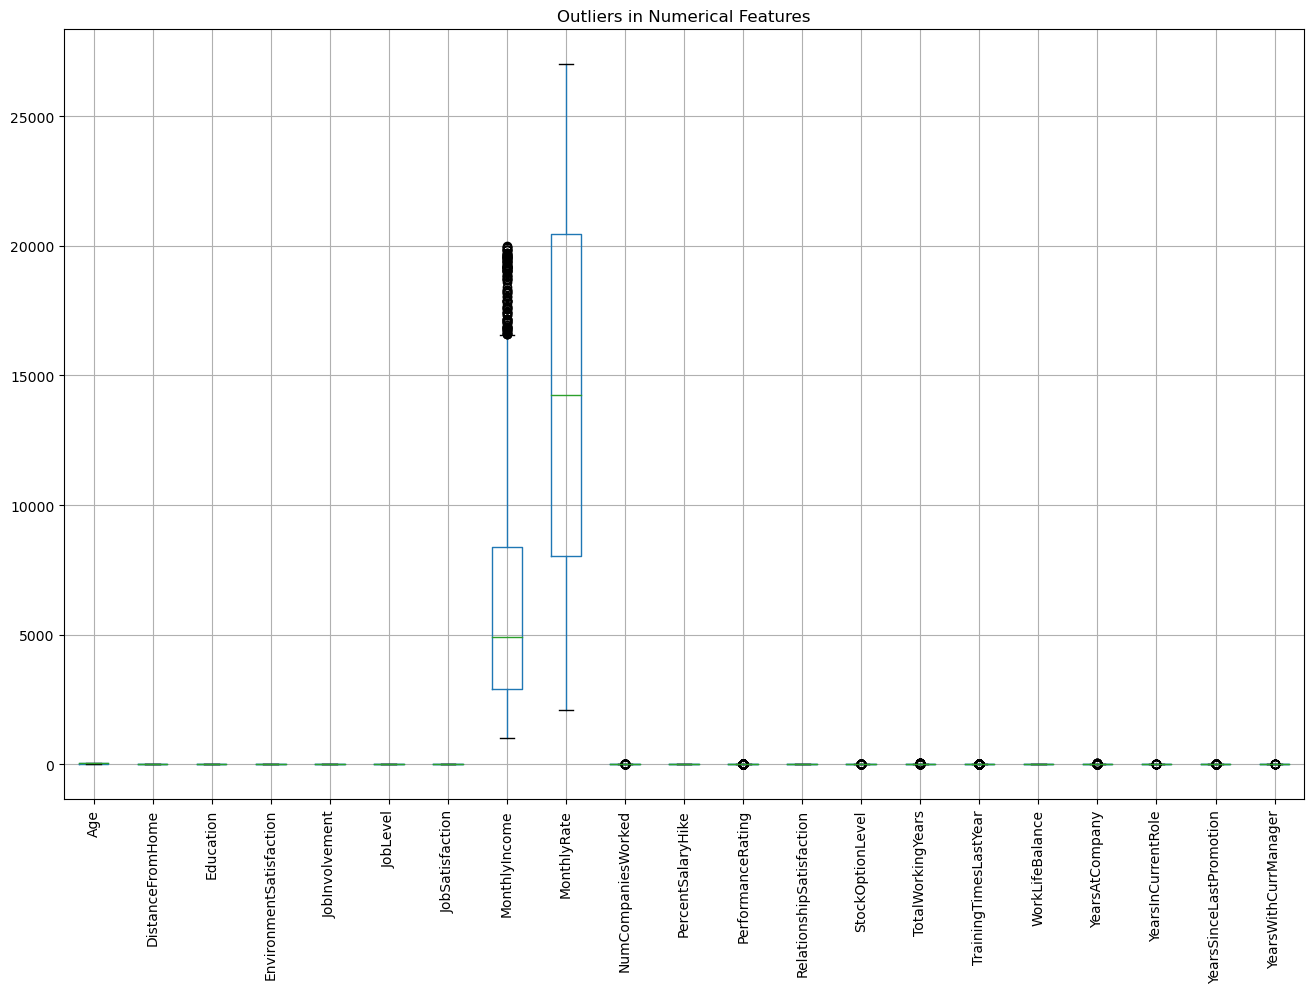

In [6]:
plt.figure(figsize=(16, 10)) 
df.select_dtypes(include=['int64', 'float64']).boxplot(rot=90) 
plt.title("Outliers in Numerical Features")
plt.show()

Categorical features need to be converted into numerical values using label encoding, one-hot encoding, or ordinal encoding.

Label Encoding for Binary Categorical Columns

In [7]:
from sklearn.preprocessing import LabelEncoder

binary_categorical_columns = ['Gender', 'OverTime', 'Attrition']

label_encoder = LabelEncoder()

for col in binary_categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

One-Hot Encoding for Multi-Category Columns

In [8]:
multi_category_columns = ['MaritalStatus', 'EducationField', 'JobRole', 'Department']

df = pd.get_dummies(df, columns=multi_category_columns, drop_first=True)

Ordinal Encoding for BusinessTravel

In [9]:
business_travel_mapping = {
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
}

df['BusinessTravel'] = df['BusinessTravel'].map(business_travel_mapping)

Numerical columns need scaling to ensure they are on a similar scale for modeling.

Columns to transform:
- **Age (int)**
- **DistanceFromHome (int)**:
- **Monthly Income (int)**:
- **PercentageSalaryHike (int)**:
- **YearsAtCompany (int)**:
- **YearsInCurrentRole (int)**:
- **YearsSinceLastPromotion (int)**:
- **YearsWithCurrManager (int)**:
- **TotalWorkingYears (int)**:
- **NumCompaniesWorked (int)**:
- **TrainingTimesLastYear (int)**:


In [16]:
from sklearn.preprocessing import StandardScaler

numerical_columns = [
    'Age', 'DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike', 
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
    'YearsWithCurrManager', 'TotalWorkingYears', 'NumCompaniesWorked', 
    'TrainingTimesLastYear'
]

scaler = StandardScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

#### **Feature Engineering**

We can create new features to capture additional insights: 

- **PromotionStagnation** : Ratio of YearsSinceLastPromotion to YearsAtCompany.
- **RoleStagnation** : Ratio of YearsInCurrentRole to YearsAtCompany.
- **ManagerTenureImpact** : Ratio of YearsWithCurrManager to YearsAtCompany.
- **IncomeToHikeRatio** : Ratio of Monthly Income to PercentageSalaryHike.

Creating new features like PromotionStagnation, RoleStagnation, ManagerTenureImpact, and IncomeToHikeRatio can provide deeper insights into employee behavior, satisfaction, and career progression. These engineered features capture relationships between existing variables that might not be immediately apparent, helping us better understand the factors influencing employee attrition and career growth. 

In [17]:
df['PromotionStagnation'] = df['YearsSinceLastPromotion'] / df['YearsAtCompany']
df['RoleStagnation'] = df['YearsInCurrentRole'] / df['YearsAtCompany']
df['ManagerTenureImpact'] = df['YearsWithCurrManager'] / df['YearsAtCompany']
df['IncomeToHikeRatio'] = df['MonthlyIncome'] / df['PercentSalaryHike']

df.fillna(0, inplace=True) 

Here is the new and transformed dataset

In [18]:
df.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Research & Development,Department_Sales,PromotionStagnation,RoleStagnation,ManagerTenureImpact,IncomeToHikeRatio
0,0.446350,1,1,-1.010909,2,2,0,3,2,4,...,False,False,True,False,False,True,4.125708,0.384513,-1.493405,0.094172
1,1.322365,0,2,-0.147150,1,3,1,2,2,2,...,False,True,False,False,True,False,-0.754779,1.565989,1.651031,-0.137002
2,0.008343,1,1,-0.887515,2,4,1,2,1,3,...,False,False,False,False,True,False,0.593506,1.020443,1.010173,16.373254
3,-0.429664,0,2,-0.764121,4,4,0,3,1,3,...,False,True,False,False,True,False,1.556960,4.723744,-7.137721,0.663709
4,-1.086676,0,1,-0.887515,1,1,1,3,1,2,...,False,False,False,False,True,False,0.071276,0.752680,0.727898,0.735105


## **VI. Exploratory Data Analysis** 

#### 1. Data Overview  

 Summary statistics (mean, median, standard deviation, etc.).

In [19]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Research & Development,Department_Sales,PromotionStagnation,RoleStagnation,ManagerTenureImpact,IncomeToHikeRatio
count,1.470000e+03,1470.000000,1470.000000,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470,1470,1470,1470,1470,1470,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,False,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1390,1178,1144,1387,961,1024,NaN,NaN,NaN,NaN
mean,-3.504377e-17,0.161224,1.086395,4.350262e-17,2.912925,2.721769,0.600000,2.729932,2.063946,2.728571,...,NaN,NaN,NaN,NaN,NaN,NaN,-7.053776,-21.019815,-22.705011,-0.097954
std,1.000340e+00,0.367863,0.532170,1.000340e+00,1.024165,1.093082,0.490065,0.711561,1.106940,1.102846,...,NaN,NaN,NaN,NaN,NaN,NaN,167.934519,135.661284,142.102957,4.859645
min,-2.072192e+00,0.000000,0.000000,-1.010909e+00,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,-1120.764847,-573.934887,-605.102916,-49.803476
25%,-7.581700e-01,0.000000,1.000000,-8.875151e-01,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.071276,0.690985,0.667924,-0.708562
50%,-1.011589e-01,0.000000,1.000000,-2.705440e-01,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.692289,1.035074,1.010173,0.114779
75%,6.653541e-01,0.000000,1.000000,5.932157e-01,4.000000,4.000000,1.000000,3.000000,3.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.556960,1.616053,1.688777,0.924939


Data dimensions (number of rows and columns). 

In [20]:
df.shape

(1470, 46)

Data types and data distribution (categorical, numerical, etc.)

In [21]:
df.dtypes

Age                                  float64
Attrition                              int32
BusinessTravel                         int64
DistanceFromHome                     float64
Education                              int64
EnvironmentSatisfaction                int64
Gender                                 int32
JobInvolvement                         int64
JobLevel                               int64
JobSatisfaction                        int64
MonthlyIncome                        float64
MonthlyRate                            int64
NumCompaniesWorked                   float64
OverTime                               int32
PercentSalaryHike                    float64
PerformanceRating                      int64
RelationshipSatisfaction               int64
StockOptionLevel                       int64
TotalWorkingYears                    float64
TrainingTimesLastYear                float64
WorkLifeBalance                        int64
YearsAtCompany                       float64
YearsInCur

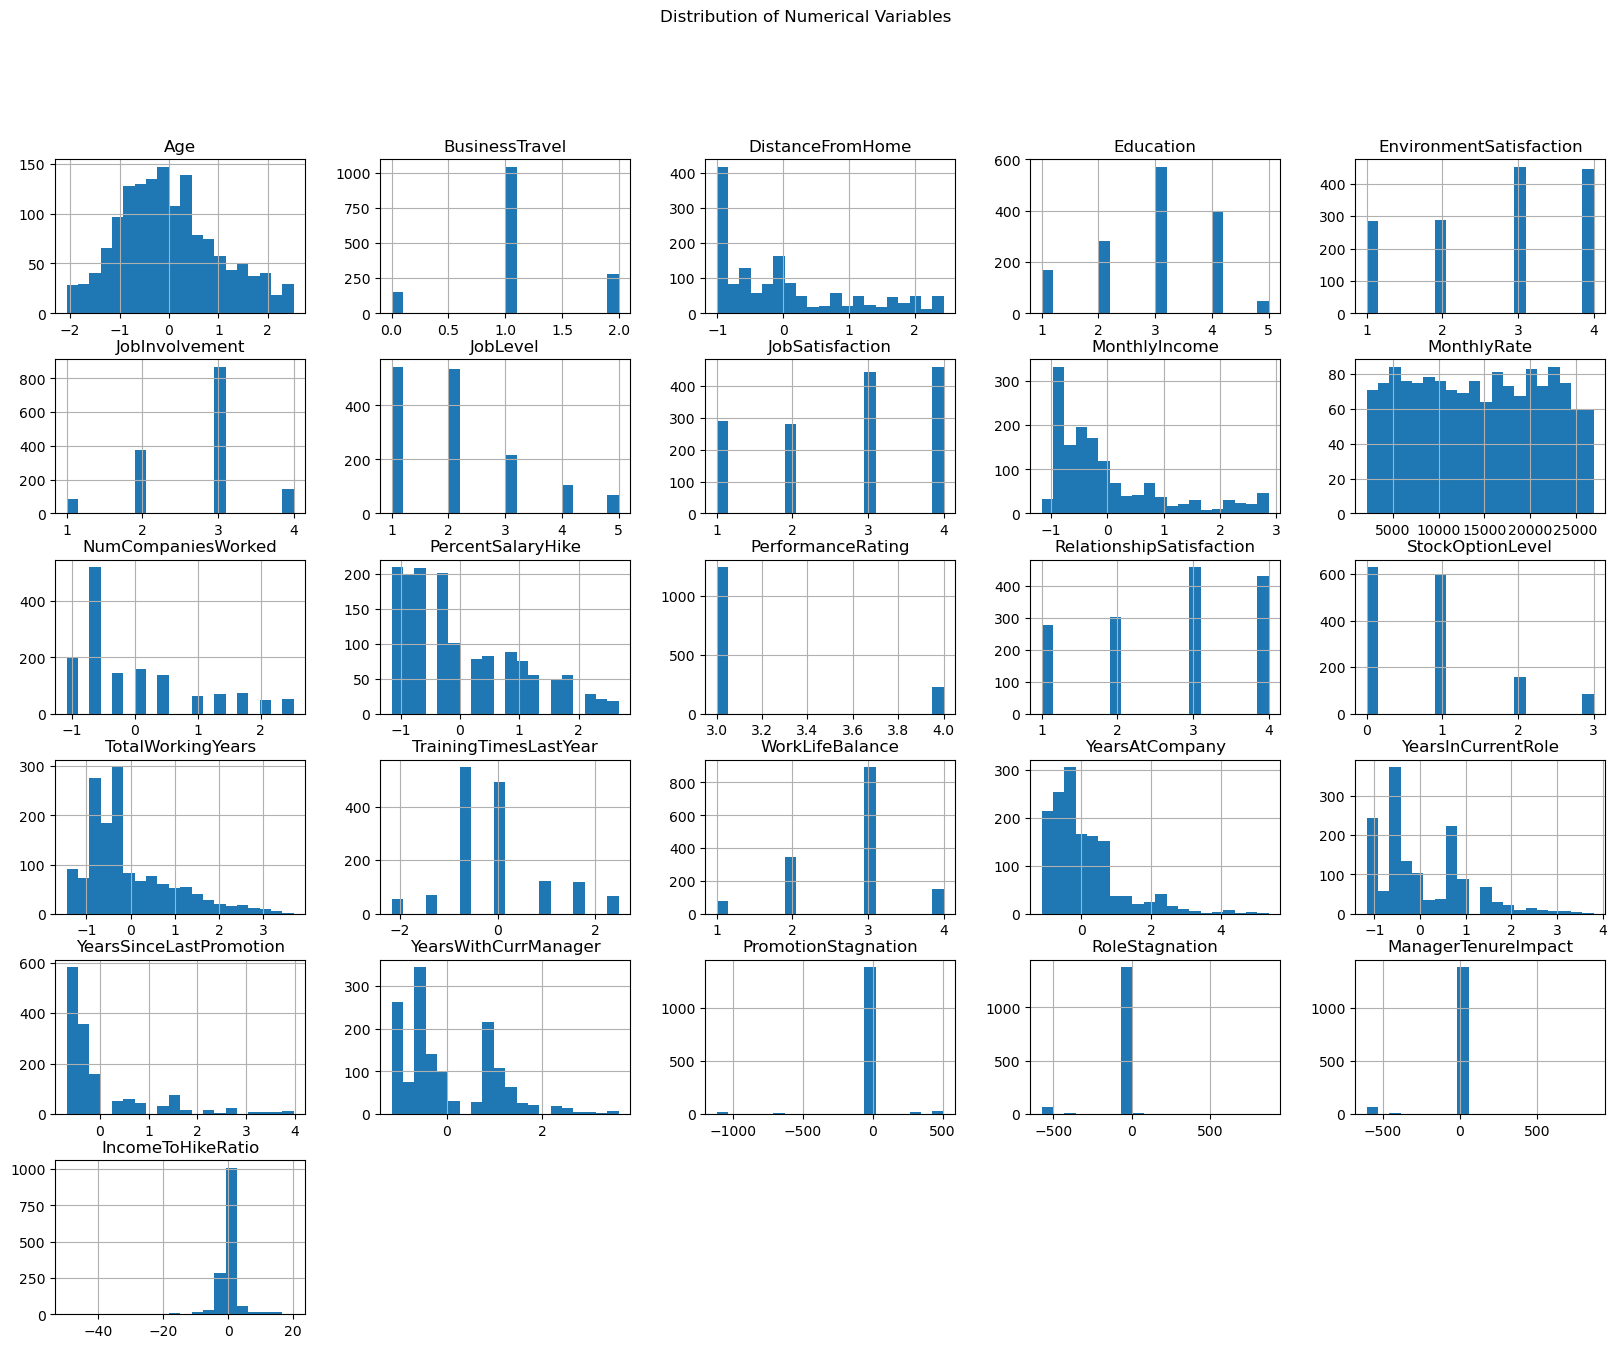

In [22]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns].hist(bins=20, figsize=(20, 15))
plt.suptitle("Distribution of Numerical Variables")
plt.show()

Missing data and handling strategies. 


In [24]:
df.isnull().sum()

Age                                  0
Attrition                            0
BusinessTravel                       0
DistanceFromHome                     0
Education                            0
EnvironmentSatisfaction              0
Gender                               0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
OverTime                             0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
MaritalStatus_Married    

Since there are no missing data, no data handling is necessary.

#### 2. Univariate Analysis

Visualizations and summary statistics for individual variables.

In [25]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns].describe()

,Age,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PromotionStagnation,RoleStagnation,ManagerTenureImpact,IncomeToHikeRatio
count,1.470000e+03,1470.000000,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1.470000e+03,1470.000000,...,1.470000e+03,1470.000000,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000
mean,-3.504377e-17,1.086395,4.350262e-17,2.912925,2.721769,2.729932,2.063946,2.728571,-4.471102e-17,14313.103401,...,8.700523e-17,2.761224,-3.021015e-17,9.063045e-17,1.208406e-18,-2.779334e-17,-7.053776,-21.019815,-22.705011,-0.097954
std,1.000340e+00,0.532170,1.000340e+00,1.024165,1.093082,0.711561,1.106940,1.102846,1.000340e+00,7117.786044,...,1.000340e+00,0.706476,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,167.934519,135.661284,142.102957,4.859645
min,-2.072192e+00,0.000000,-1.010909e+00,1.000000,1.000000,1.000000,1.000000,1.000000,-1.167343e+00,2094.000000,...,-2.171982e+00,1.000000,-1.144294e+00,-1.167687e+00,-6.791457e-01,-1.155935e+00,-1120.764847,-573.934887,-605.102916,-49.803476
25%,-7.581700e-01,1.000000,-8.875151e-01,2.000000,2.000000,2.000000,1.000000,2.000000,-7.632087e-01,8047.000000,...,-6.201892e-01,2.000000,-6.544537e-01,-6.154916e-01,-6.791457e-01,-5.952272e-01,0.071276,0.690985,0.667924,-0.708562
50%,-1.011589e-01,1.000000,-2.705440e-01,3.000000,3.000000,3.000000,2.000000,3.000000,-3.365516e-01,14235.500000,...,1.557071e-01,3.000000,-3.278933e-01,-3.393937e-01,-3.687153e-01,-3.148735e-01,0.692289,1.035074,1.010173,0.114779
75%,6.653541e-01,1.000000,5.932157e-01,4.000000,4.000000,3.000000,3.000000,4.000000,3.986245e-01,20461.500000,...,1.557071e-01,3.000000,3.252275e-01,7.649976e-01,2.521455e-01,8.065415e-01,1.556960,1.616053,1.688777,0.924939
max,2.526886e+00,2.000000,2.444129e+00,5.000000,4.000000,4.000000,5.000000,4.000000,2.867626e+00,26999.000000,...,2.483396e+00,4.000000,5.386914e+00,3.802074e+00,3.977310e+00,3.610079e+00,509.524985,876.050379,867.233099,20.228246


Box plots show the distribution of numerical variables and identify outliers.

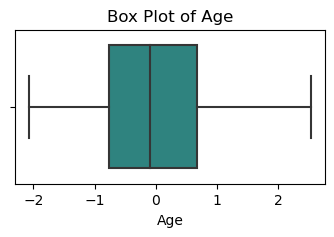

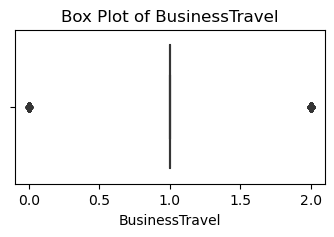

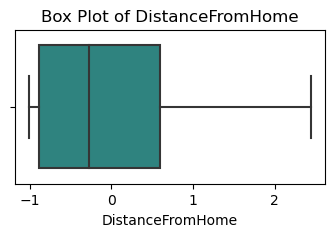

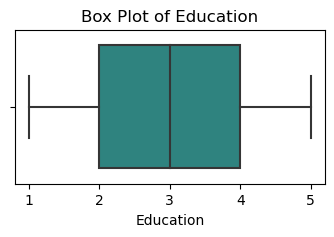

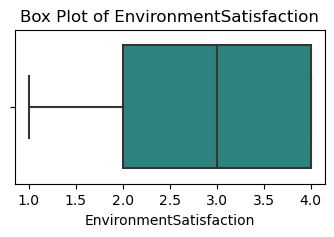

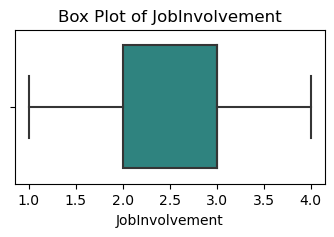

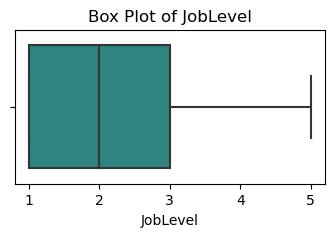

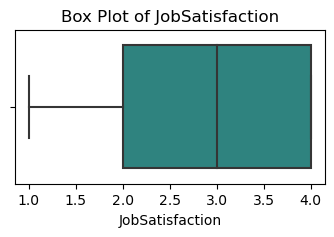

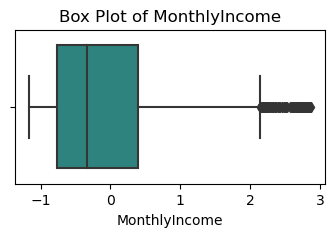

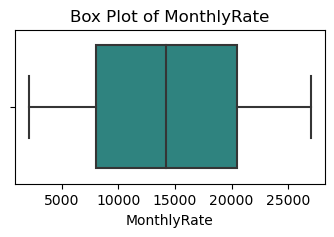

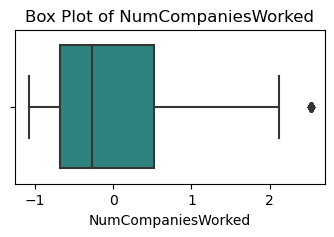

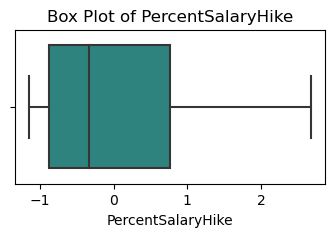

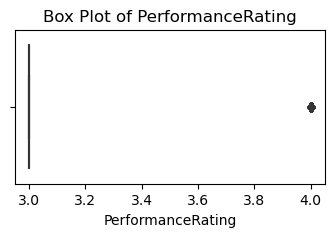

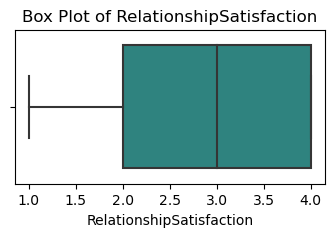

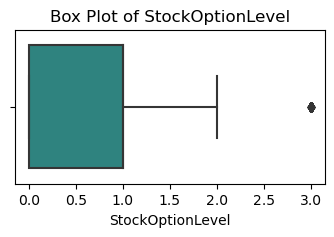

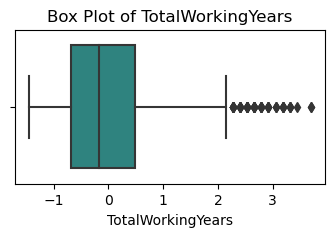

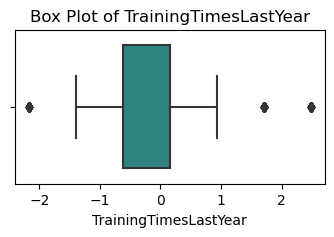

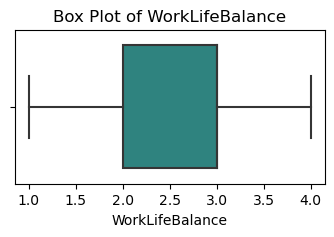

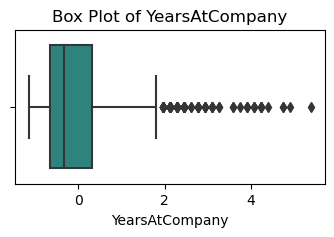

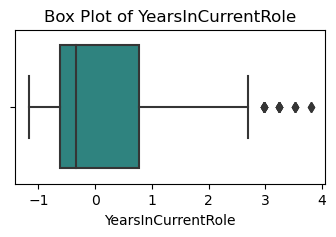

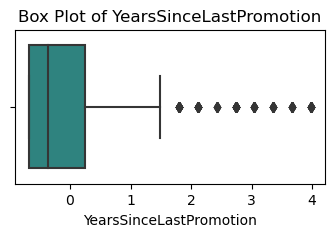

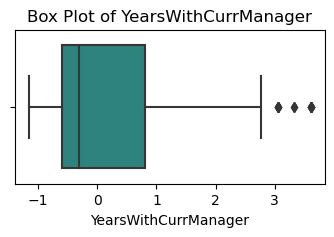

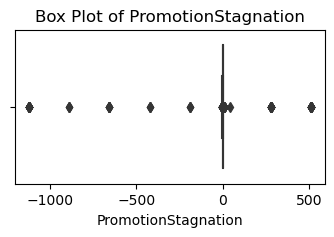

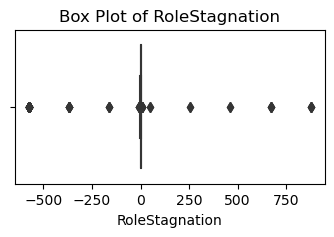

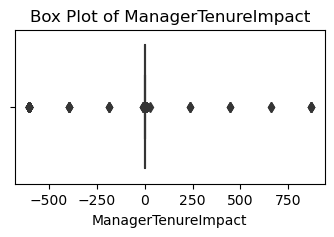

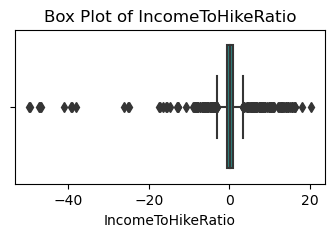

In [26]:
for col in numerical_columns:
    plt.figure(figsize=(4, 2))
    sns.boxplot(data=df, x=col, palette='viridis')
    plt.title(f"Box Plot of {col}")
    plt.show()

Below, we created a function to detect outliers. Outliers can be identified using box plots or statistical methods like the Interquartile Range (IQR).

The IQR method identifies outliers as values below Q1 - 1.5 X IQR or abvoe Q3 + 1.5 X IQR.

In [30]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    outliers = detect_outliers(df, col)
    print(f"Number of outliers in {col}: {len(outliers)}")
    print("-" * 50)

Number of outliers in Age: 0
--------------------------------------------------
Number of outliers in BusinessTravel: 427
--------------------------------------------------
Number of outliers in DistanceFromHome: 0
--------------------------------------------------
Number of outliers in Education: 0
--------------------------------------------------
Number of outliers in EnvironmentSatisfaction: 0
--------------------------------------------------
Number of outliers in JobInvolvement: 0
--------------------------------------------------
Number of outliers in JobLevel: 0
--------------------------------------------------
Number of outliers in JobSatisfaction: 0
--------------------------------------------------
Number of outliers in MonthlyIncome: 114
--------------------------------------------------
Number of outliers in MonthlyRate: 0
--------------------------------------------------
Number of outliers in NumCompaniesWorked: 52
--------------------------------------------------
Numb

#### 3. Bivariate Analysis

#### 4. Multivariate Analysis

## **Reference/s** 
-   IBM HR Analytics Employee Attrition & Performance. (2017, March 31). https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data

## **By Data Alchemists** 
- Bon, Jan Louise B. 
- Brodett, Ram David M.
- Lopez, Ghee Kaye S. 
- Paguiligan, James Archer B. 
- Sanchez, Matthew Heinz O. 